In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import numpy as np

### Import our raw data from the Non-AU and AU tables

In [2]:
# Non AU data
non_au_auth = pd.read_csv('data/9.23/volumes.csv').rename(columns = {'publisher':'publisher_id'})

# AU data
au_auth = pd.read_csv('data/9.23/volumesAU.csv')

# Combine tables for all data in one place
auth = non_au_auth.append(au_auth).reset_index(drop=True)
auth['requests'] = auth['requests'].round(0).astype(int)

### Filer data intp seperate dataframes by request type

### Plot data

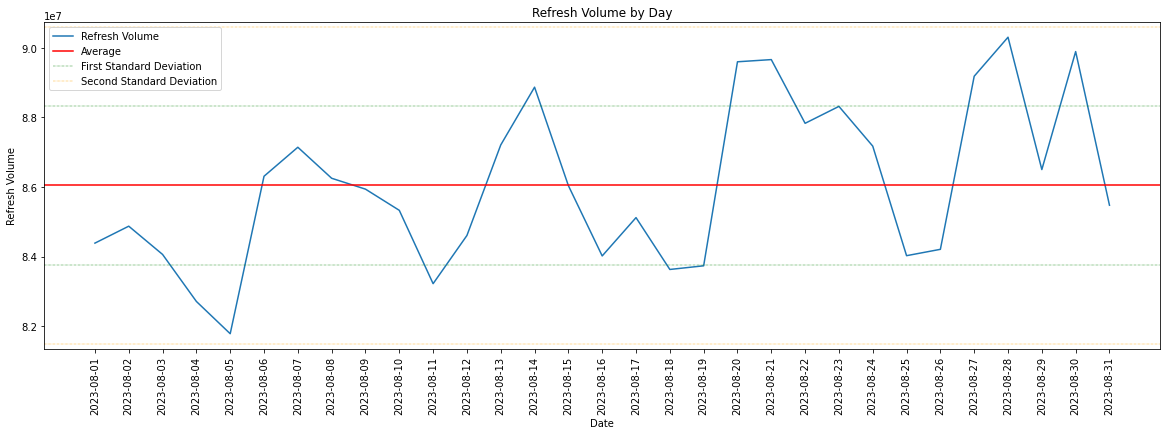

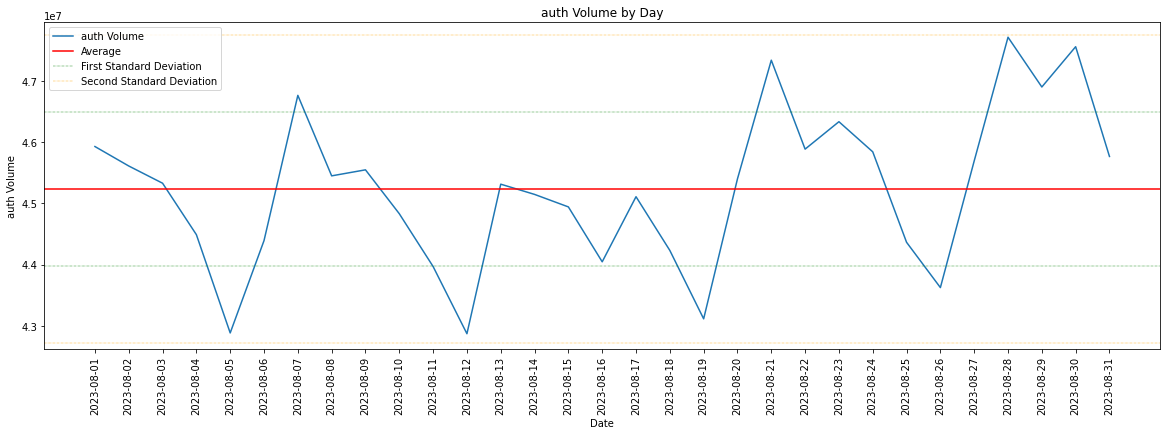

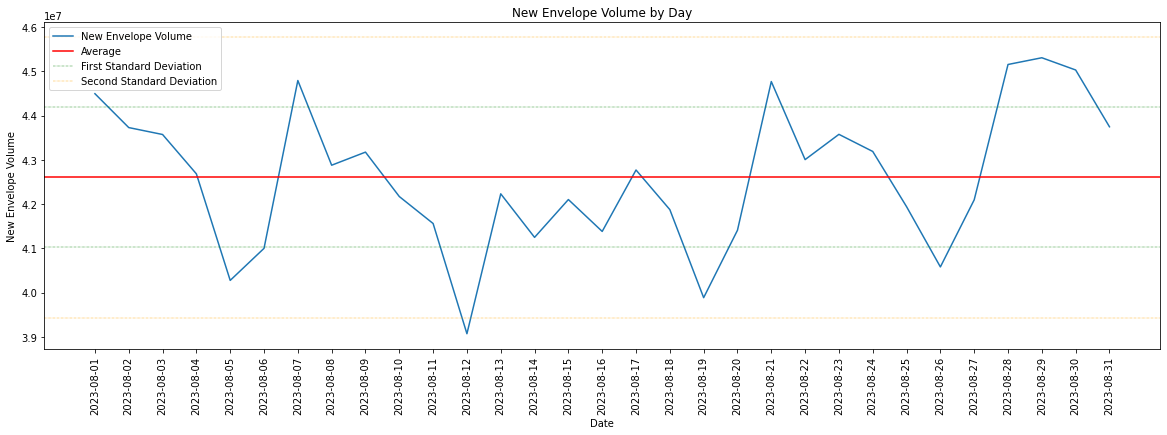

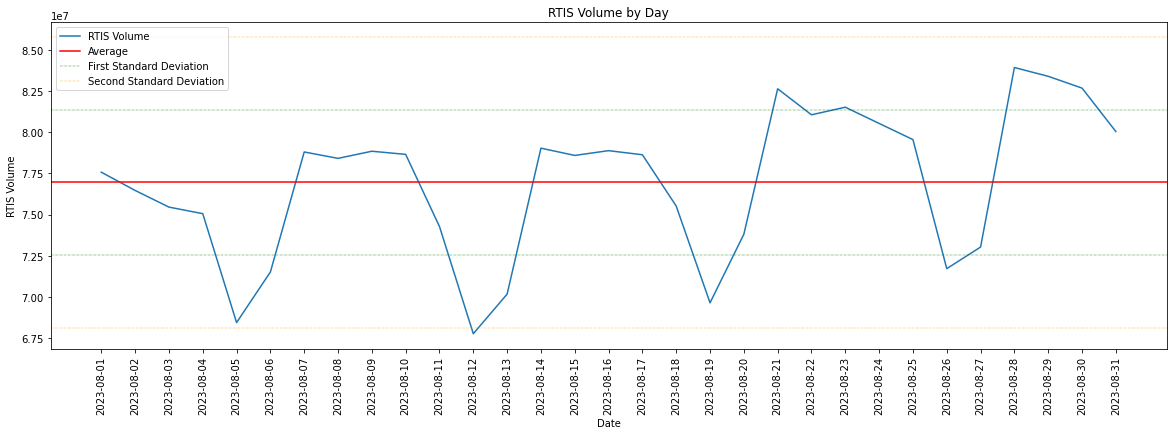

In [3]:
for i in auth['request_types'].unique():
    #Create this iteration's DataFrame
    df = auth[auth['request_types'] == i].set_index('day').groupby(['day'])['requests'].sum()
    
    # Plot daily envelope volumes
    plt.figure(figsize=(20,6))
    plt.plot(df, label=f'{i} Volume')
    plt.title(f'{i} Volume by Day')
    plt.ylabel(f'{i} Volume')
    plt.xlabel('Date');

    # Add mean and standard devitions of daily envelope volumes
    mean = df.mean()
    std1 = np.std(df)
    std2 = std1 * 2

    plt.axhline(y = mean, color = 'r', label='Average')
    plt.axhline(y = mean + std1, color = 'green', linestyle =  '-.', linewidth = .4, label='First Standard Deviation')
    plt.axhline(y = mean - std1, color = 'green', linestyle =  '-.', linewidth = .4)
    plt.axhline(y = mean + std2, color = 'orange', linestyle =  '-.', linewidth = .4, label='Second Standard Deviation')
    plt.axhline(y = mean - std2, color = 'orange', linestyle =  '-.', linewidth = .4)

    # Rotate the tick marks.
    plt.xticks(rotation = 90)

    # Add legend
    plt.legend()
    
    #Save as PNG
    plt.savefig(f'./outputs/9.23/png/{i}.png');
    
    #Export CSV data as well
    data = auth[auth['request_types'] == i].groupby(['day', 'request_types'])['requests'].agg(['sum','mean','min','max']).rename(columns = {'sum':'total_requests','mean':'avg_requests','amin':'min_requests','amax':'max_requests'}).reset_index().set_index('day')
    
    data.to_csv(f'./outputs/9.23/csv/{i}.csv')
    